# Oakland Crime 探索性分析与预处理报告

In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import crime_process

确定数据集根目录：

In [2]:
root = 'data/oakland-crime-statistics-2011-to-2016/'
file_lst = ['records-for-' + str(x) + '.csv' for x in range(2011,2017)]

导入数据：

In [3]:
crime = crime_process.crime_data(root, file_lst)
crime_data = crime.data
crime_data[0]

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1,06X,1,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1,07X,1,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1,10Y,2,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2,21Y,2,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2,20X,1,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000
...,...,...,...,...,...,...,...,...,...,...
180011,OP,2011-12-31T23:52:15.000,WB 26TH AV,2,21X,2,415GS,415 GUNSHOTS,LOP111231001014,2012-01-01T01:40:10.000
180012,OP,2011-12-31T23:53:59.000,WERNER 40TH STREET WY,1,09X,1,PDOA,POSSIBLE DEAD PERSON,LOP111231001015,2012-01-01T02:30:22.000
180013,OP,2011-12-31T23:55:52.000,WOOD AV&KEMPTON AV,1,08X,1,918,PERSON SCREAMING,LOP111231001016,2012-01-01T00:25:03.000
180014,OP,2011-12-31T23:58:08.000,WOODSON B ST,2,33X,2,415GS,415 GUNSHOTS,LOP111231001017,2012-01-01T02:59:48.000


数据包含：  
1. Agency                      机构名称，除缺失值外，只有唯一值OP
2. Create Time                 案件创建时间
3. Location                    案件发生地点
4. Area Id                     案件发生地区代码
5. Beat                        案件发生的巡逻区域
6. Priority                    优先级
7. Incident Type Id            案件类型ID
8. Incident Type Description   案件类型描述
9. Event Number                案件标号
10. Closed Time                案件结束时间

### Agency

查找缺失值个数:

In [4]:
crime.select_col('Agency')
none_before = crime.count_none()

2011 : 1
2012 : 1
2013 : 1
2014 : 0
2015 : 0
2016 : 1


In [5]:
index11,row11 = crime.get_row_index(0, '')
index12,row12 = crime.get_row_index(1, '')
index13,row13 = crime.get_row_index(2, '')
index16,row16 = crime.get_row_index(5, '')
print(row11)
print(row12)
print(row13)
print(row16)

[array(['', '', '   ', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '', '', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]
[array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]


缺失值整行为空，直接删除即可。

In [6]:
crime.delete_row(0,index11)
crime.delete_row(1,index12)
crime.delete_row(2,index13)
crime.delete_row(5,index16)
none_after = crime.count_none()

2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0


缺失值处理前后对比：

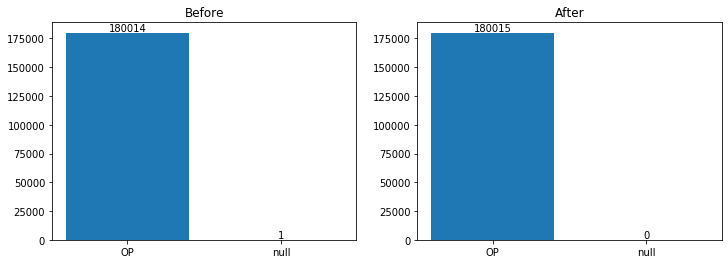

In [7]:
#2011年
crime.normal_bar(0,12,4,none_before[0],none_after[0],['OP','null'])

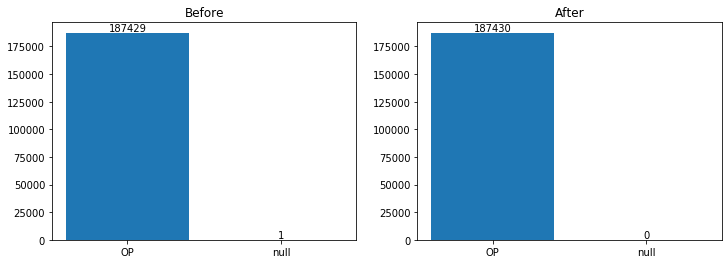

In [8]:
#2012年
crime.normal_bar(1,12,4,none_before[0],none_after[0],['OP','null'])

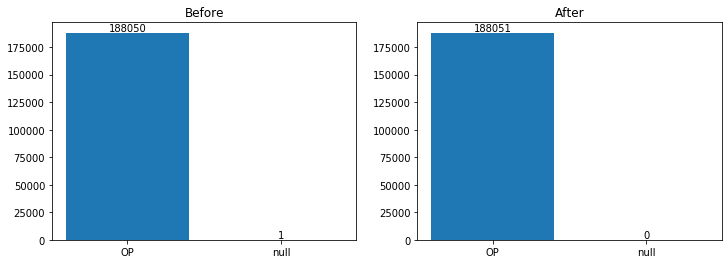

In [9]:
#2013年
crime.normal_bar(2,12,4,none_before[0],none_after[0],['OP','null'])

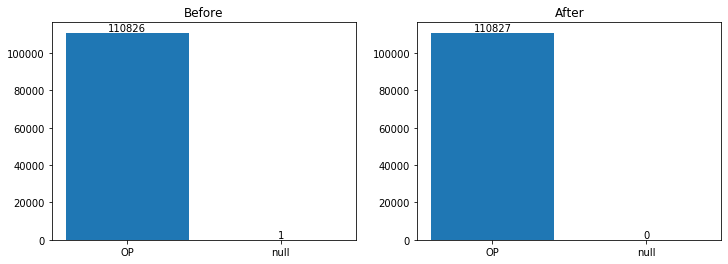

In [10]:
#2016年
crime.normal_bar(5,12,4,none_before[0],none_after[0],['OP','null'])

### 案件持续时间
使用__Closed Time - Create Time__得到

查找缺失值：

In [11]:
crime.select_col('Closed Time')
crime.count_none('')

2011 : 6
2012 : 18
2013 : 1
2014 : 0
2015 : 0
2016 : 0


[6, 18, 1, 0, 0, 0]

In [12]:
index11,row11 = crime.get_row_index(0, '')
index12,row12 = crime.get_row_index(1, '')
index13,row13 = crime.get_row_index(2, '')

close time存在缺失值，可能是未结案或未录入时间。  
处理方式： 删除这些记录

In [13]:
crime.delete_row(0,index11)
crime.delete_row(1,index12)
crime.delete_row(2,index13)
none_after = crime.count_none()

2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0


__构造案件持续时间列：__

In [14]:
crime.generate_new_col('Create Time','Closed Time',crime_process.time_interval)
crime.data[0]

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,duration
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1,06X,1,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000,28
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1,07X,1,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000,71
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1,10Y,2,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000,5
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2,21Y,2,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000,0
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2,20X,1,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000,47
...,...,...,...,...,...,...,...,...,...,...,...
180010,OP,2011-12-31T23:51:14.000,WB REDWOOD RD&REDWOOD RD,1,22Y,2,SECCK,SECURITY CHECK,LOP111231001011,2012-01-01T00:44:22.000,53
180011,OP,2011-12-31T23:52:15.000,WB 26TH AV,2,21X,2,415GS,415 GUNSHOTS,LOP111231001014,2012-01-01T01:40:10.000,107
180012,OP,2011-12-31T23:53:59.000,WERNER 40TH STREET WY,1,09X,1,PDOA,POSSIBLE DEAD PERSON,LOP111231001015,2012-01-01T02:30:22.000,156
180013,OP,2011-12-31T23:55:52.000,WOOD AV&KEMPTON AV,1,08X,1,918,PERSON SCREAMING,LOP111231001016,2012-01-01T00:25:03.000,29


五数概括：

In [15]:
crime.select_col('duration')
crime.five_number()

Year 2011
Min: 0,Q1: 20.0,Q2: 56.0,Q3: 128.0,Max: 1439
Year 2012
Min: 0,Q1: 23.0,Q2: 64.0,Q3: 148.0,Max: 1439
Year 2013
Min: 0,Q1: 25.0,Q2: 72.0,Q3: 169.0,Max: 1439
Year 2014
Min: 0,Q1: 24.0,Q2: 71.0,Q3: 172.0,Max: 1439
Year 2015
Min: 0,Q1: 21.0,Q2: 66.0,Q3: 161.0,Max: 1439
Year 2016
Min: 0,Q1: 22.0,Q2: 70.0,Q3: 173.0,Max: 1439


盒图：

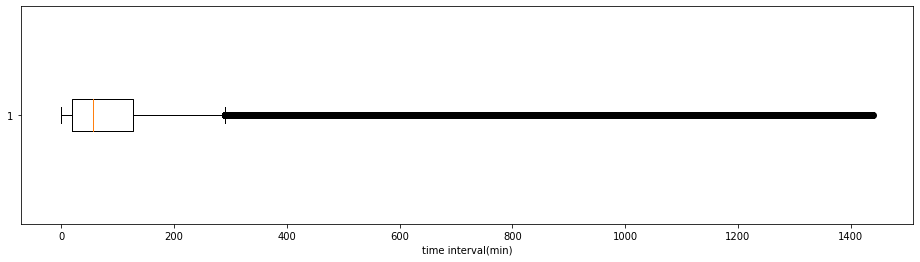

290.0


In [16]:
# 2011年
crime.box(0,16,4,'time interval(min)')

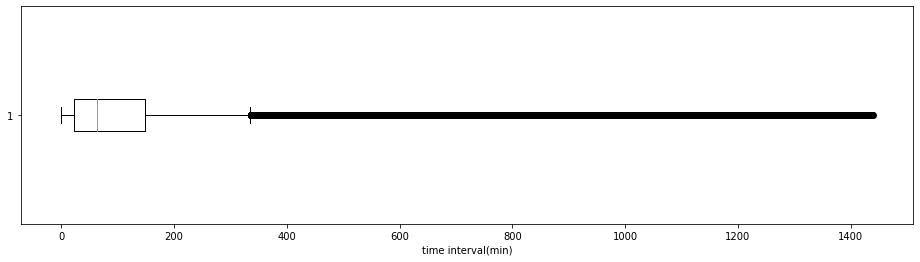

335.5


In [17]:
# 2012年
crime.box(1,16,4,'time interval(min)')

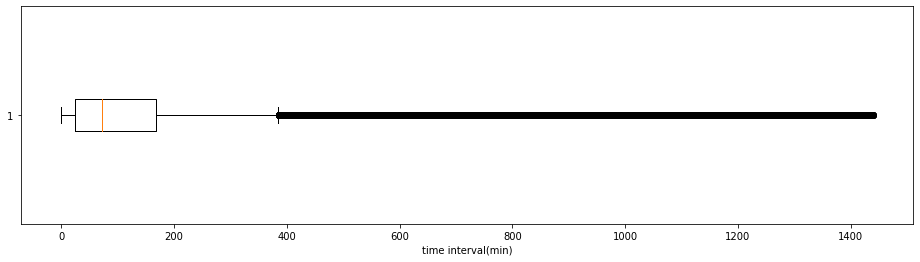

385.0


In [18]:
# 2013年
crime.box(2,16,4,'time interval(min)')

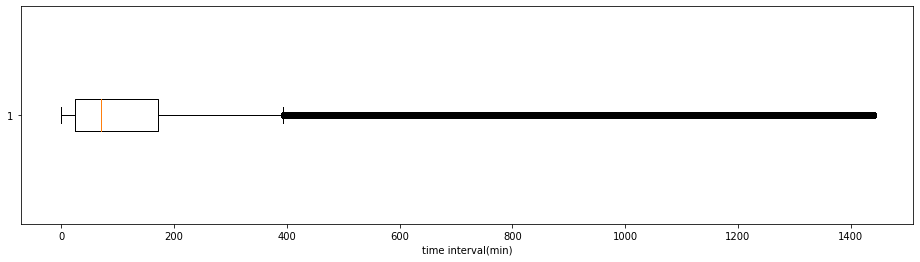

394.0


In [19]:
# 2014年
crime.box(3,16,4,'time interval(min)')

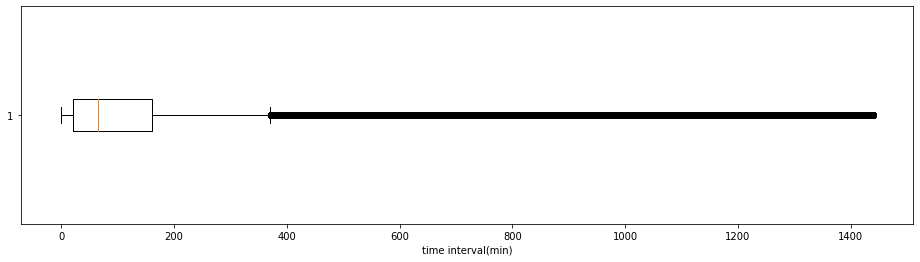

371.0


In [20]:
# 2015年
crime.box(4,16,4,'time interval(min)')

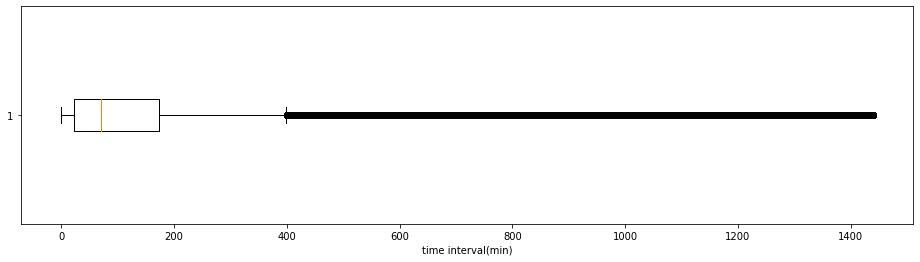

399.5


In [22]:
# 2016年
crime.box(5,16,4,'time interval(min)')

直方图：

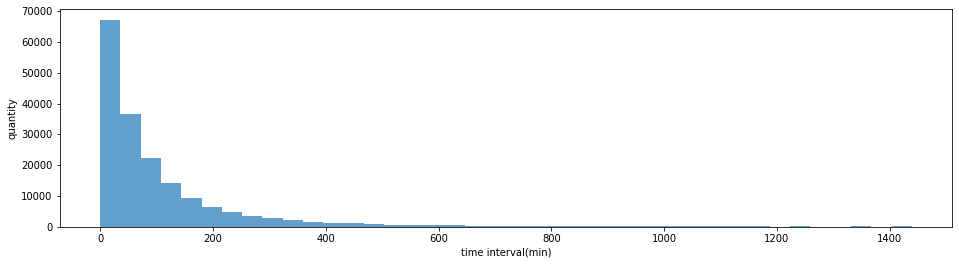

In [23]:
# 2011年
crime.normal_hist(0,16,4,'time interval(min)','quantity')

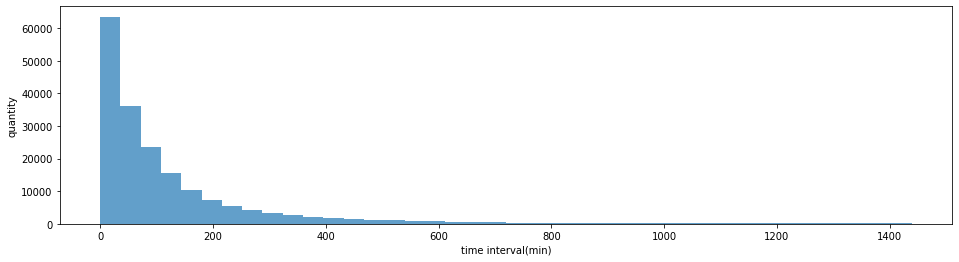

In [24]:
# 2012年
crime.normal_hist(1,16,4,'time interval(min)','quantity')

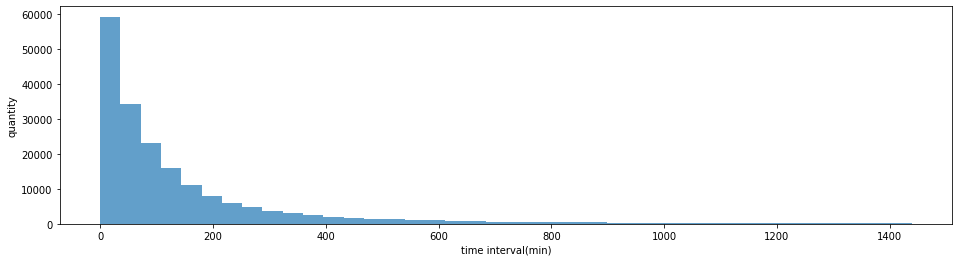

In [25]:
# 2013年
crime.normal_hist(2,16,4,'time interval(min)','quantity')

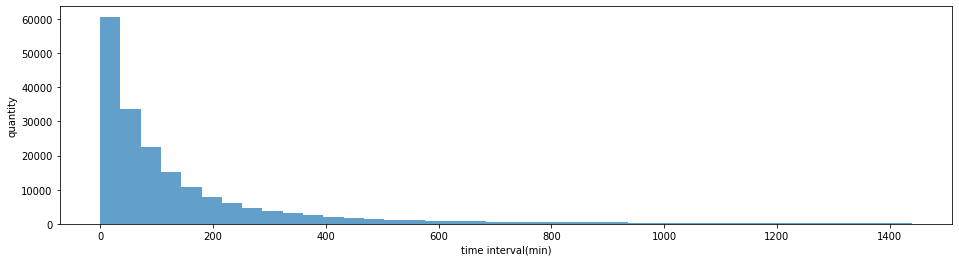

In [26]:
# 2014年
crime.normal_hist(3,16,4,'time interval(min)','quantity')

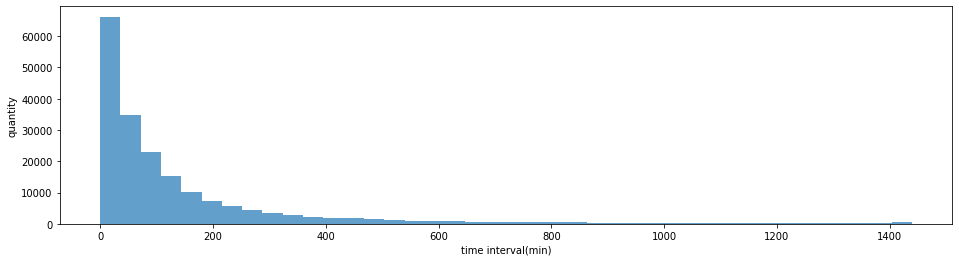

In [27]:
# 2015年
crime.normal_hist(4,16,4,'time interval(min)','quantity')

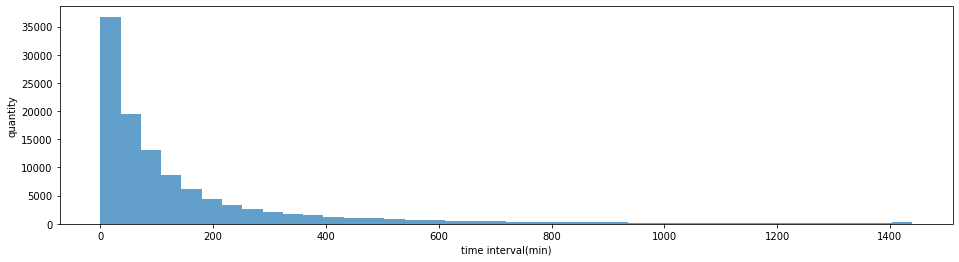

In [28]:
# 2016年
crime.normal_hist(5,16,4,'time interval(min)','quantity')